# Subreddit sentiments on Trader Joe's vs. Wholefoods

Trader Joe's and Wholefoods are two popular grocery chains who boast organic and sustainable products.

![alt text](https://shriyagettingsocial.files.wordpress.com/2014/02/whole-foods-vs-trader-joes.png "Logo Title Text 1")

Trader Joe's in general has small store, handwritten signs, formatted layout, mostly TJ's own brands with limited other brands emphasizing organic, high quality gourmets, creating a predicted shopping experience similar to the stores in local community.[[1]](https://radiantbrands.com/trader-joes-vs-whole-foods-are-they-the-same-customers-for-different-brands/)
Whole Foods has a wide range of products and brands including its own brand (365), the store are generally larger, and also provide online order with same-day delivery option with amazon prime membership in many big cities. It also emphasizes natural, sustainable and organic materials and sourcing.[[1]](https://radiantbrands.com/trader-joes-vs-whole-foods-are-they-the-same-customers-for-different-brands/)

**These two chain are are different in many aspects, but they are often considered as competitors.** Endless debates online over who has the best organic brands, who has the best low price yet high quality food, etc. Why is this the case? This is mostly because they share the same customers. Studies showed that customers who seek high quality and low price organic gourmet tends to visit both stores.[[2]](https://www.grocerydive.com/news/why-trader-joes-traffic-has-recovered-but-whole-foods-hasnt/587536/)

Pandemic had an impact on in-store visits in general, and it has been recovered slightly after reopen of stores/business across the country early this year; **however, in the showdown, Whole foods still fall behind Trader Joe's.** Whole Foods trying to improve the situation by providing online grocery orders to amazon prime members, a big advantage over Trader Joe's, but still it did not even out the loss for in-store visit.[[2]](https://www.grocerydive.com/news/why-trader-joes-traffic-has-recovered-but-whole-foods-hasnt/587536/) On ther other hand, despite of lack of a big e-commerce giant's support, Trader Joe's has seen an recovery of frequent visit in store.

The major complain on wholefoods is the price, the price for organic products are higher than average.[[3]](https://www.businessinsider.com/whole-foods-or-trader-joes-best-healthy-grocery-store-2019-8#though-everything-looked-fresh-we-couldnt-help-be-put-off-by-the-prices-that-seemed-to-be-higher-than-average-the-prices-plus-the-chic-atmosphere-made-the-shopping-experience-seem-more-high-end-and-not-tailored-to-the-average-customer-9)    **In the organic-grocery-market showdown, Trader Joe's wins the cake.**




### How is the sentiment on Trader Joe's and Whole Foods reflected in the subreddits posts?
* We'll look into the 1000 recent subreddit posts for each 'wholefoods' and 'traderjoes' and investigate their comments on both food stores. 
* Investigate the positive, negative and overall sentiment score on the sbureddit posts on the two grocery chain stores.
* Explore various modeling algorithms to predict the subreddit posts as in Trader Joe's or Whole Foods category.

In [4]:
#imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re
import time

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
#define a function to get the res
def get_requests(subreddit,epoch_time):
    url='https://api.pushshift.io/reddit/search/submission'
    df_list=[]
    for _ in range(10):
        params={
            'subreddit':subreddit,
            'size':100,
            'before':epoch_time}
        res=requests.get(url,params)
        data=res.json()
        epoch_time=data['data'][-1]['created_utc']
        print(res.status_code)
        print(epoch_time)
        post_df=pd.DataFrame(data['data'])
        df_list.append(post_df)
        time.sleep(3)
    return pd.concat(df_list)

In [6]:
wholefoods=get_requests('wholefoods',1632922497)

200
1632158318
200
1631448653
200
1630778865
200
1630071955
200
1629393470
200
1628520632
200
1627767962
200
1627092553
200
1626481915
200
1625553358


In [7]:
traderjoes=get_requests('traderjoes',1632922497)

200
1632613203
200
1632254283
200
1631990555
200
1631672074
200
1631468251
200
1631235400
200
1630949624
200
1630460267
200
1630112958
200
1629690269


In [8]:
#create the dataframe with only title and subreddit columns for wholefoods
wf_df = wholefoods[['title','subreddit']]

#create the dataframe with only title and subreddit columns for trader joes
tj_df = traderjoes[['title','subreddit']]

#combine the wholefoods and trader joes dataframe into one
df=pd.concat([wf_df,tj_df])

In [9]:
#verify the size of the df
df.shape

(2000, 2)

In [10]:
#expot the datafile to a csv file for modeling
#df.to_csv('datasets/subreddit_title.csv', index=False)

### EDA on subreddit posts

In [11]:
#create a column with word counts
df['title_word_count']=[len(re.findall(r'\w+',item)) for item in df['title']]

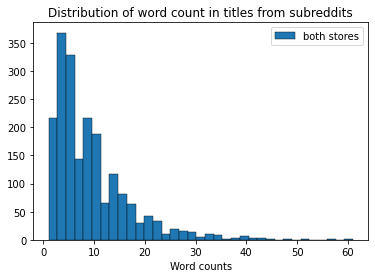

In [50]:
#create a histogram plot to show the distriution of word counts in titles
df['title_word_count'].hist(bins=35, grid=False, edgecolor='black', linewidth=.4, label='both stores')
plt.legend(loc=0)
plt.xlabel('Word counts')
plt.title('Distribution of word count in titles from subreddits');

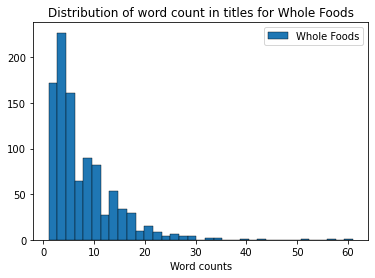

In [51]:
#check the word count distribution for wholefoods
df.loc[df['subreddit'] =='wholefoods',['title_word_count']].hist(bins=35, grid=False, edgecolor='black', linewidth=.4, label='Whole Foods')
plt.legend(loc=0)
plt.xlabel('Word counts')
plt.title('Distribution of word count in titles for Whole Foods');

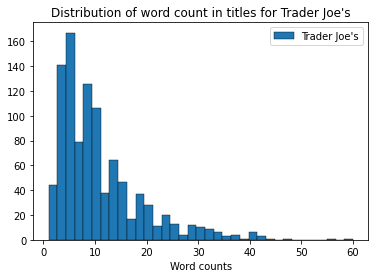

In [54]:
#check the word count distribution for traderjoes
df.loc[df['subreddit'] =='traderjoes',['title_word_count']].hist(bins=35, grid=False, edgecolor='black', linewidth=.4, label='Trader Joe\'s')
plt.legend(loc=0)
plt.xlabel('Word counts')
plt.title('Distribution of word count in titles for Trader Joe\'s');

## Both stores has similar distribution in post word lengths

### Sentimental Analysis

In [15]:
#Instantiate the object
sia=SentimentIntensityAnalyzer()

In [18]:
#get the polarity_score
sia_score_df=pd.DataFrame([sia.polarity_scores(item) for item in df['title']], index=df.index)

In [19]:
#add the sia_score to the df dataframe
df_sia=pd.concat([df, sia_score_df], axis=1)
df_sia.head()

,title,subreddit,title_word_count,neg,neu,pos,compound
0,Can I work here two days a week or should I pu...,wholefoods,16,0.000,1.000,0.000,0.0000
1,John Mackey and Andy Jassy need to watch this ...,wholefoods,10,0.000,1.000,0.000,0.0000
2,This is how entitled customers are,wholefoods,6,0.000,0.704,0.296,0.2732
3,How to correct a punch in Krono?,wholefoods,7,0.000,1.000,0.000,0.0000
4,Ridiculously Complex and Ambiguous Assessment ...,wholefoods,6,0.324,0.676,0.000,-0.3400


### How is the overall score for Trader Joes and Whole Foods?

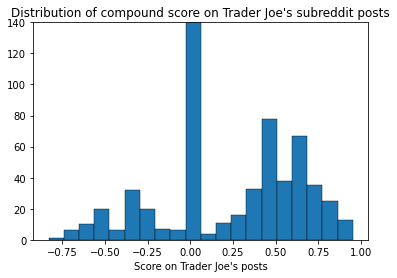

In [55]:
#Display the distribution of compound sia score for posts on Trader Joes
df_sia[df_sia['subreddit'] == 'traderjoes']['compound'].hist(bins=20, grid=False, edgecolor='black', linewidth=.4)
plt.title('Distribution of compound score on Trader Joe\'s subreddit posts')
plt.xlabel('Score on Trader Joe\'s posts')
plt.ylim((0,140));

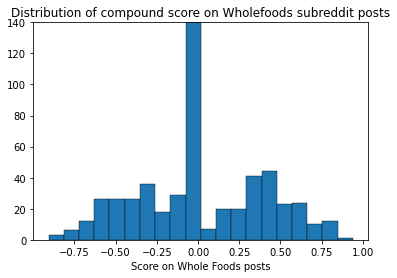

In [56]:
#Display the distribution of compound sia score for posts on Whole Foods
df_sia[df_sia['subreddit'] == 'wholefoods']['compound'].hist(bins=20, grid=False,edgecolor='black', linewidth=.4)
plt.title('Distribution of compound score on Wholefoods subreddit posts')
plt.xlabel('Score on Whole Foods posts')
plt.ylim((0,140));

#### Let's put together some easily intepretable comparison based on sentimental analysis
* To create a bar plot to show the counts for > .5 compound score from sia analysis
* To create a bar plot to show the counts for < -.5 compound score from sia analysis

In [31]:
# wholefoods >.5
wf_high=sum(df_sia[df_sia['subreddit'] == 'wholefoods']['compound']>.5)
# trader joes >.5
tj_high=sum(df_sia[df_sia['subreddit'] == 'traderjoes']['compound']>.5)

# wholefoods <-.5
wf_low=sum(df_sia[df_sia['subreddit'] == 'wholefoods']['compound']<(-0.5))
# trader joes <-.5
tj_low=sum(df_sia[df_sia['subreddit'] == 'traderjoes']['compound']<(-0.5))

In [32]:
#create a df
rate_dict={'low_rate':[wf_low, tj_low], 'high_rate':[wf_high, tj_high]}
rate_df=pd.DataFrame(rate_dict).T
rate_df.columns=['Whole Foods', 'Trader Joes']
#check the rate df
rate_df

,Whole Foods,Trader Joes
low_rate,54,31
high_rate,66,179


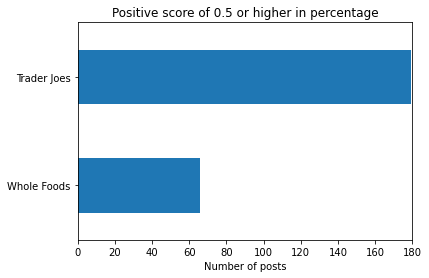

In [57]:
plt.title('Positive score of 0.5 or higher in percentage')
plt.xlim((0,180))
plt.xlabel('Number of posts')
rate_df.iloc[1,:].plot(kind='barh');

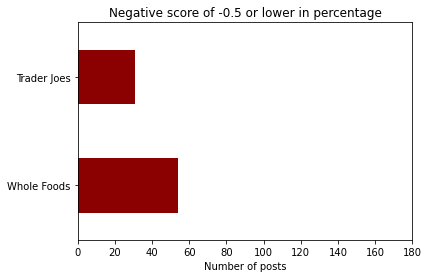

In [58]:
plt.title('Negative score of -0.5 or lower in percentage')
plt.xlim((0,180))
plt.xlabel('Number of posts')
rate_df.iloc[0,:].plot(kind='barh',color='darkred');

### NLP Finding: In terms of the positive comments battle, Trader Joe's win over Whole Foods by a large margin 
* Trader Joe's does win over Whole Foods by a large margin in positive sentimental score based on the subrredit data
* Trader Joe's has slightly less negative scores than Whole Foods from subrredits

